#Forêts aléatoires
Dans ce TP, nous utiliserons les méthodes d'*ensemble learning* (*bagging* et *boosting*)



## Ensemble learning

L'idée est de combiner plusieurs modèles pour en faire un ensemble plus performants.

En général, on distingue deux familles de méthodes de ce type :

1. Méthodes par moyennage (*bagging*, forêts aléatoires) où le principe est de faire la moyenne de plusieurs prédictions .  
1. Méthodes adaptatives (*boosting*) où les paramètres sont itérativement adaptés pour produire un meilleur mélange.  


Dans la suite nous explorerons chacune de ces classes d’algorithme.

## *Bagging*

Les méthodes de type *bagging* construisent plusieurs instances d’un estimateur, calculées sur des échantillons aléatoires tirés de la base d’apprentissage. On réalise ensuite la moyenne des estimations pour réduire la variance de l'estimateur. 
Dans Scikit-learn, les méthodes de *bagging* sont implémentées via la classe `BaggingClassifier` et `BaggingRegressor`. Les constructeurs prennent en paramètres un estimateur de base et la stratégie de sélection des points et des *features* :

> - `base_estimator` : optionnel (default=None). Si None alors l’estimateur est un arbre de décision.  
- `max_samples` : la taille de l’échantillon aléatoire tiré de la base d’apprentissage.  
- `max_features` : le nombre de *features* tirés aléatoirement.  
- `bootstrap` : boolean, optionnel (default=True). Tirage des points avec remise ou non.  
- `bootstrap_features` : boolean, optionnel (default=False). Tirage des *features* avec remise ou non.  
- `oob_score` : boolean. Estimer ou non l’erreur de généralisation OOB (*Out of Bag*).  

Le code suivant construit un ensemble des classifieurs. Chaque classifieur de base est un `KNeighborsClassifier` (c’est-à-dire k-plus-proches-voisins), chacun utilisant au maximum 50% des points pour son apprentissage et la moitié des *features* :

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

Dans cet exemple nous allons utiliser la base de données `digits`, qui contient 10 classes (images des chiffres en écriture manuscrite). Il y a 1797 éléments, chaque élément a 64 attributs (8 pixels par 8).

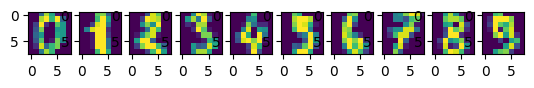

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

# Affichage des 10 premières images
import matplotlib.pyplot as plt
fig = plt.figure()
for i, digit in enumerate(digits.images[:10]):
    fig.add_subplot(1,10,i+1)
    plt.imshow(digit)
plt.show()

Pour établir des performances de référence, nous allons implémenter un arbre de décision pour la classification dans un premier temps sans découper la base d'apprentissage.

In [ ]:
# A compléter

1.0


Sur la base d’apprentissage `accuracy = 1` . Découpons à présent la base de données en un jeu d’apprentissage et un jeux de test afin d'étudier la généralisation de l’arbre sur des données différentes de celles d’apprentissage :

In [ ]:
# A completer
from sklearn.model_selection import train_test_split
# 90% des données pour le test, 10% pour l'apprentissage


Quelle est la variance de la valeur `accuracy` sur 100 tirages pour la séparation apprentissage/test. Que pouvons-nous conclure ? 

In [ ]:
N = 100
accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracies.append(clf.score(X_test,y_test))
    print(accuracies[i])

# A compléter

Pour comparer, construisons maintenant avec la méthode `BaggingClassifier` un classifieur *bagging* sur nos données, toujours basé sur les `DecisionTreeClassifier` :

In [ ]:
# A compléter

L’apprentissage et l’évaluation de cet ensemble se font de la façon habituelle :

In [ ]:
# A compléter

Calculer la variance de la valeur `accuracy` sur 100 tirages pour la séparation apprentissage/test. Comparer avec la variance du classifieur de base. Que pouvons-nous conclure ?



Construire le graphique `accuracy` vs `n_estimators`. Que constatez-vous ?

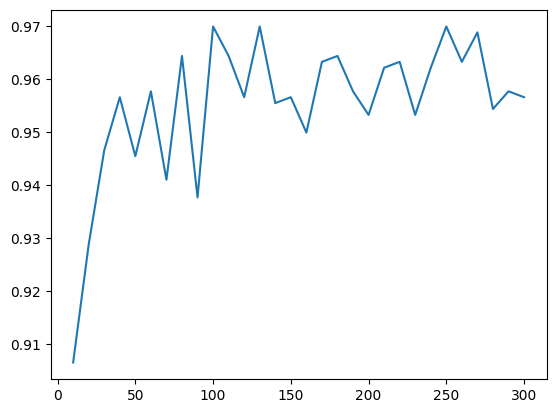

In [ ]:
N = 30
accuracy = []

for i in range(N):
# A compléter (entrainement avec le classifieur BaggingClassifier)
  accuracy.append(clf.score(X_test,y_test))
import matplotlib.pyplot as plt
plt.plot([10*(i+1) for i in range(N)], accuracy)
plt.show()

<img src="_images/tpforetsfig1.svg" style="width:100%;">

Faites varier les parametres `max_samples` et `max_features`. Pour quelles valeurs on obtient le meilleur résultat ? On pourra notamment utiliser `GridSearchCV` pour réaliser une recherche systématique.

In [ ]:
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

#A completer
# importer GridSearchCV
pgrid = {"max_samples": [0.2, 0.4, 0.6, 0.8],
        "max_features": [0.2, 0.4, 0.6, 0.8]}
#A completer
# Faire le fit en utilisant GridSearchCV
print("Meilleur score : " + str(grid_search.best_estimator_.score(X_test, y_test)))
print("max_samples: " + str(grid_search.best_estimator_.max_samples))
print("max_features: " + str(grid_search.best_estimator_.max_features))

## Forêts aléatoires

L’algorithme des forêts aléatoires propose une optimisation des arbres de décision. Il utilise le même principe que le *bagging*, mais avec une étape supplémentaire de randomisation dans la sélection des attributs des nœuds dans le but de réduire la variance de l’estimateur obtenu. Les deux objets Python qui implémentent les forêts aléatoires sont `RandomForestClassifier` et `RandomForestRegressor`. Les paramètres les plus importants sont :

> - `n_estimators` : integer, optional (default=10). Le nombre d’arbres.  
- `max_features` : le nombre d’attributs à considérer à chaque split.  
- `max_samples` : la taille de l’échantillon aléatoire tiré de la base d’apprentissage.  
- `min_samples_leaf` : le nombre minimal d’éléments dans un nœud feuille.  
- `oob_score` : boolean. Estimer ou non l’erreur de généralisation OOB (*Out of Bag*).  



Par la suite nous allons refaire la classification sur la base Digits en utilisant un classifieur `RandomForestClassifier`. Comme d’habitude, on sépare les données en gardant 10% pour l’apprentissage et 90% pour le test.

In [ ]:
digits = load_digits()
X, y = digits.data, digits.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

On peut désormais créer et entraîner notre modèle :

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

Puis réaliser les prédictions et calculer le score de test :

In [ ]:
# Compléter

Comment la valeur de la variable `accuracy` se compare avec le cas *bagging* qui utilise le même nombre d’arbres (200 dans notre cas) ?

In [ ]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Arbre de décision : " + str(clf.score(X_test,y_test)))

clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Bagging (200 arbres) : " + str(clf.score(X_test,y_test)))

clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Forêt aléatoire (200 arbres) : " + str(clf.score(X_test,y_test)))

Les forêts aléatoires produisent un classifieur un peu meilleur sur cette base de données.

Construire la variance de la valeur `accuracy` sur 10 tirages pour la séparation apprentissage/test. Que pouvons-nous conclure en comparant avec la séction précedente (*bagging*) ?

In [ ]:
N = 10

bagging_accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators=30)
    clf.fit(X_train, y_train)
    bagging_accuracies.append(clf.score(X_test,y_test))

print(np.mean(bagging_accuracies), np.std(bagging_accuracies))


rf_accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf = RandomForestClassifier(n_estimators=30)
    clf.fit(X_train, y_train)
    rf_accuracies.append(clf.score(X_test,y_test))

print(np.mean(rf_accuracies), np.std(rf_accuracies))

Construire le graphique `accuracy` vs `n_estimators`. Que constatez-vous ? A partir de quelle valeur on n’améliore plus ?

In [ ]:
N = 30
accuracy = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

for i in range(N):
    clf = RandomForestClassifier(n_estimators=(i+1)*10)
    clf.fit(X_train, y_train)
    accuracy.append(clf.score(X_test,y_test))
    print((i+1)*10, accuracy[i])

plt.plot([10*(i+1) for i in range(30)], accuracy)
plt.show()

<img src="_images/tpforetsfig2.svg" style="width:100%;">

  
A partir de `n_estimators = 50` le résultat commence à osciller autour de la moyenne donc on ne gagne plus rien en augmentant la valeur.

## *Boosting*

Le principe du *boosting* est d’évaluer une séquence de classifieurs sur plusieurs versions légèrement modifiées des données d’apprentissage. Les décisions obtenues sont alors combinées par une somme ponderée pour obtenir le modèle final.

Avec scikit-learn, c’est la classe `AdaBoostClassifier` qui implémente cet algorithme. Les paramètres les plus importants sont :

> - `n_estimators` : integer, optional (default=10). Le nombre de classifieurs faibles.  
- `learning_rate` : contrôle la vitesse de changement des poids par itération.  
- `base_estimator` : (default=DecisionTreeClassifier) le classifieur faible utilisé.  

Dans la suite nous allons refaire la classification sur la base Digits en utilisant un classifieur `RandomForestClassifier` :

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

# AdaBoost basé sur 200 arbres de décision
clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=5), n_estimators=200, learning_rate=2)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

Le paramètre `max_depth` contrôle la profondeur de l’arbre. Essayez plusieurs valeurs pour voir l’impact de l’utilisation d’un classifieur faible vs plus fort (`max_depth` élevé ou éliminer le paramètre). Testez aussi l’effet du paramètre `learning_rate` et le nombre de classifieurs.